In [15]:
import os

os.chdir('..')

In [31]:
from bnn_v2 import BNN
from buffers import MultiEnvReplayBuffer
import tqdm

In [35]:
import matplotlib.pyplot as plt

In [25]:
buff = MultiEnvReplayBuffer(1_000)
buff.read_buffers('VBLRL_rl_exam/buffer_stock/random_buff')

old buffer to load: name: ['buffer_env48.pkl', 'buffer_env22.pkl', 'buffer_env41.pkl', 'buffer_env43.pkl', 'buffer_env29.pkl', 'buffer_env09.pkl', 'buffer_env34.pkl', 'buffer_env40.pkl', 'buffer_env26.pkl', 'buffer_env01.pkl', 'buffer_env10.pkl', 'buffer_env13.pkl', 'buffer_env42.pkl', 'buffer_env49.pkl', 'buffer_env19.pkl', 'buffer_env45.pkl', 'buffer_env46.pkl', 'buffer_env35.pkl', 'buffer_env32.pkl', 'buffer_env50.pkl', 'buffer_env04.pkl', 'buffer_env15.pkl', 'buffer_env28.pkl', 'buffer_env20.pkl', 'buffer_env06.pkl', 'buffer_env18.pkl', 'buffer_env07.pkl', 'buffer_env33.pkl', 'buffer_env12.pkl', 'buffer_env16.pkl', 'buffer_env11.pkl', 'buffer_env23.pkl', 'buffer_env36.pkl', 'buffer_env05.pkl', 'buffer_env08.pkl', 'buffer_env30.pkl', 'buffer_env37.pkl', 'buffer_env14.pkl', 'buffer_env38.pkl', 'buffer_env24.pkl', 'buffer_env39.pkl', 'buffer_env17.pkl', 'buffer_env21.pkl', 'buffer_env44.pkl', 'buffer_env25.pkl', 'buffer_env31.pkl', 'buffer_env27.pkl', 'buffer_env03.pkl', 'buffer_env02

In [33]:
elbo_history = []
log_like_history = []
div_kl_history = []
obs_loss_history = []
r_loss_history = []
nn = BNNdynamics(action_size=4, observation_size=39)

In [34]:
for _ in tqdm.tqdm(range(10_000)):
    
    s, a, r, s_prime, done = buff.sample_all_envs(256)
    s = torch.from_numpy(s).double().to('cuda:0')
    a = torch.from_numpy(a).double().to('cuda:0')
    r = torch.from_numpy(r).double().to('cuda:0')
    s_prime = torch.from_numpy(s_prime).double().to('cuda:0')
    
    elbo, log_like, div_kl, obs_loss, r_loss = nn.update_posterior(s, a, r, s_prime)
    elbo_history.append(elbo)
    log_like_history.append(log_like.item())
    div_kl_history.append(div_kl.item())
    obs_loss_history.append(obs_loss.item())
    r_loss_history.append(r_loss.item())



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:08<00:00, 53.05it/s]


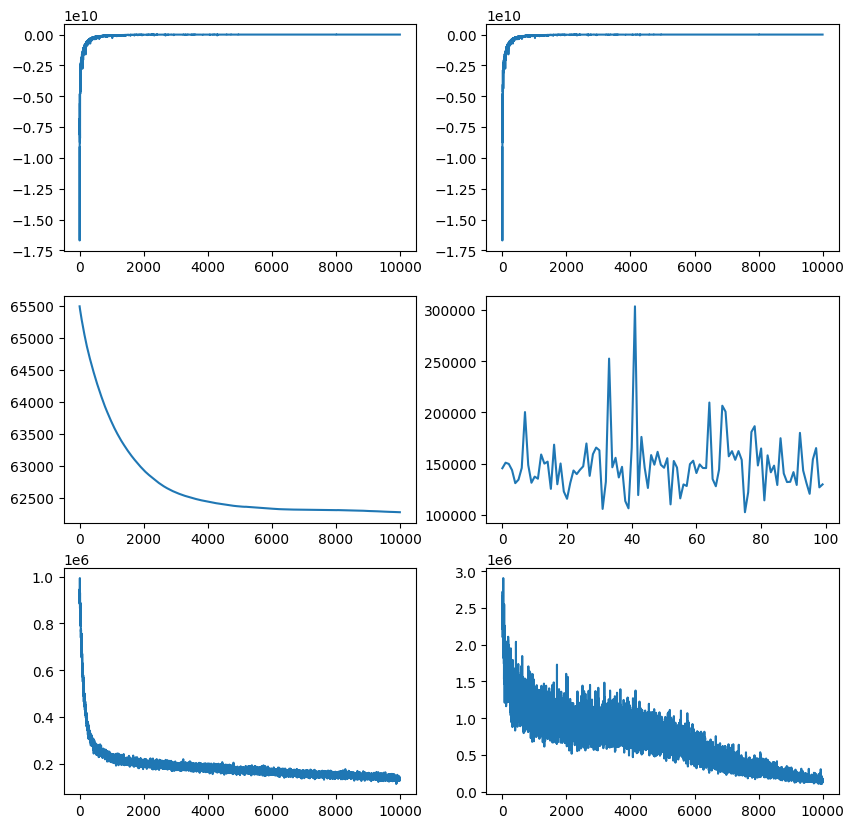

In [45]:
fig, ax = plt.subplots(3, 2, figsize=(10, 10))
ax[0,0].plot(elbo_history)
ax[0, 1].plot(log_like_history)
ax[1, 0].plot(div_kl_history)
ax[2, 0].plot(obs_loss_history)
ax[2, 1].plot(r_loss_history)

ax[1, 1].plot(r_loss_history[-100:])